In [476]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [477]:
df_train = pd.read_csv("train.csv").copy()
df_test = pd.read_csv("test.csv").copy()

In [478]:
df_train.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,3321,17,1,Caucasian,High School,9.906353,25,0,High,1,1,0,0,1.082390
1,1160,18,0,Caucasian,High School,4.681156,20,0,High,0,0,0,1,1.189549
2,2644,16,0,Other,Some College,6.845312,13,0,NaN,0,0,1,0,1.852672
3,2321,18,0,Asian,High School,19.885760,2,0,High,1,0,0,0,3.517237
4,2419,15,1,African American,Bachelor,14.806261,20,0,Very High,0,0,0,0,1.582093


In [479]:
df_test.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,2340,16,1,Other,Higher,5.044048,25,1,Moderate,1,0,0,0,0.886889
1,2923,18,0,Other,Bachelor,18.731312,12,0,Moderate,1,0,0,0,2.234696
2,2077,16,0,Asian,Some College,0.213403,23,1,Moderate,0,1,0,0,0.875367
3,2735,15,1,African American,Higher,14.645811,28,0,Moderate,0,0,0,0,0.648705
4,2245,17,0,Other,Some College,11.436575,1,0,High,1,0,0,0,3.463688


In [480]:
df_train.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,142
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,132
Extracurricular,0


define XTrain & XTest

Define YTrain & YTest

In [481]:
features=df_train[["Age","Gender","Ethnicity","ParentalEducation","StudyTimeWeekly","Absences","Tutoring","ParentalSupport","Extracurricular","Sports","Music","Volunteering"]].copy()
features_test=df_test[["Age","Gender","Ethnicity","ParentalEducation","StudyTimeWeekly","Absences","Tutoring","ParentalSupport","Extracurricular","Sports","Music","Volunteering"]].copy()

In [482]:
Goal=df_train["GPA"].values.reshape(-1,1)
Goal_test=df_test["GPA"].values.reshape(-1,1)

split val & train data

In [483]:
features, X_val, Goal, y_val = train_test_split(features, Goal, test_size=0.2, random_state=42)

In [484]:
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:", categorical_features)


Categorical Features: ['Ethnicity', 'ParentalEducation', 'ParentalSupport']


convert categorical data to numerical data

In [485]:
encoder_prefix = LabelEncoder()
features["Ethnicity"] = encoder_prefix.fit_transform(features["Ethnicity"])

encoder_prefix = LabelEncoder()
features["ParentalEducation"] = encoder_prefix.fit_transform(features["ParentalEducation"])

encoder_prefix = LabelEncoder()
features["ParentalSupport"] = encoder_prefix.fit_transform(features["ParentalSupport"])



encoder_prefix = LabelEncoder()
features_test["Ethnicity"] = encoder_prefix.fit_transform(features_test["Ethnicity"])

encoder_prefix = LabelEncoder()
features_test["ParentalEducation"] = encoder_prefix.fit_transform(features_test["ParentalEducation"])

encoder_prefix = LabelEncoder()
features_test["ParentalSupport"] = encoder_prefix.fit_transform(features_test["ParentalSupport"])



encoder_prefix = LabelEncoder()
X_val["Ethnicity"] = encoder_prefix.fit_transform(X_val["Ethnicity"])

encoder_prefix = LabelEncoder()
X_val["ParentalEducation"] = encoder_prefix.fit_transform(X_val["ParentalEducation"])

encoder_prefix = LabelEncoder()
X_val["ParentalSupport"] = encoder_prefix.fit_transform(X_val["ParentalSupport"])

In [486]:
X_val = np.array(X_val, dtype=np.float64)
y_val = np.array(y_val, dtype=np.float64)

filling missing data with most repeat

In [487]:
features.loc[:, "ParentalSupport"] = features["ParentalSupport"].fillna(features["ParentalSupport"].mode().iloc[0])
features.loc[:, "ParentalEducation"] = features["ParentalEducation"].fillna(features["ParentalEducation"].mode().iloc[0])




Normalizing data

In [488]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
features_test=scaler.fit_transform(features_test)
X_val=scaler.fit_transform(X_val)


Hyper parameters

In [489]:
learning_rate=0.01
epochs=1000

define NN with 3 layers

In [490]:
input_dim = features.shape[1]  # تعداد ویژگی‌های ورودی

W1 = tf.Variable(tf.random.normal([input_dim, 64], stddev=0.1, dtype=tf.float64), trainable=True)
b1 = tf.Variable(tf.zeros([64], dtype=tf.float64), trainable=True)

W2 = tf.Variable(tf.random.normal([64, 32], stddev=0.1, dtype=tf.float64), trainable=True)
b2 = tf.Variable(tf.zeros([32], dtype=tf.float64), trainable=True)

W3 = tf.Variable(tf.random.normal([32, 1], stddev=0.1, dtype=tf.float64), trainable=True)
b3 = tf.Variable(tf.zeros([1], dtype=tf.float64), trainable=True)



In [491]:
features = tf.cast(features, dtype=tf.float64)
W1 = tf.cast(W1, dtype=tf.float64)
b1 = tf.cast(b1, dtype=tf.float64)
W2 = tf.cast(W2, dtype=tf.float64)
b2 = tf.cast(b2, dtype=tf.float64)
W3 = tf.cast(W3, dtype=tf.float64)
b3 = tf.cast(b3, dtype=tf.float64)


In [492]:
def forward_pass(X):
    Z1 = tf.matmul(X, W1) + b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.matmul(A1, W2) + b2
    A2 = tf.nn.relu(Z2)
    Z3 = tf.matmul(A2, W3) + b3  # بدون Softmax چون رگرسیون است
    return Z3  # خروجی مقدار عددی است


In [493]:
optimizer = tf.optimizers.Adam(learning_rate)

train & calculate gradients

In [494]:
def train_step(X, y):
    X = tf.convert_to_tensor(X, dtype=tf.float64)
    y = tf.convert_to_tensor(y, dtype=tf.float64)

    with tf.GradientTape() as tape:
        y_pred = forward_pass(X)
        loss = tf.reduce_mean(tf.square(y_pred - y))  # MSE Loss

    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))

    return loss


In [495]:
train_losses = []
val_losses = []
r2_scores = []

# حلقه‌ی آموزش
for epoch in range(epochs):
    loss = train_step(features, Goal)
    val_loss = tf.reduce_mean(tf.square(forward_pass(X_val) - y_val))

    # ذخیره هزینه‌ها
    train_losses.append(loss.numpy())
    val_losses.append(val_loss.numpy())

    # محاسبه `R²` روی داده‌های تست
    y_test_pred = forward_pass(features_test).numpy().flatten()
    y_test_pred=y_test_pred.reshape(-1,1)
    y_mean = np.mean(Goal_test)
    ss_total = np.sum((Goal_test - y_mean) ** 2)
    ss_residual = np.sum((Goal_test - y_test_pred) ** 2)
    R2_score = 1 - (ss_residual / ss_total)
    r2_scores.append(R2_score)  # ذخیره مقدار R²

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}, Val Loss: {val_loss.numpy():.4f}, R²: {R2_score:.4f}")


Epoch 0, Loss: 4.4333, Val Loss: 4.0247, R²: -3.7373
Epoch 100, Loss: 0.0627, Val Loss: 0.0779, R²: 0.9094
Epoch 200, Loss: 0.0528, Val Loss: 0.0736, R²: 0.9118
Epoch 300, Loss: 0.0473, Val Loss: 0.0789, R²: 0.9101
Epoch 400, Loss: 0.0422, Val Loss: 0.0823, R²: 0.9031
Epoch 500, Loss: 0.0388, Val Loss: 0.0854, R²: 0.9010
Epoch 600, Loss: 0.0402, Val Loss: 0.0888, R²: 0.8995
Epoch 700, Loss: 0.0346, Val Loss: 0.0889, R²: 0.8975
Epoch 800, Loss: 0.0340, Val Loss: 0.0901, R²: 0.8952
Epoch 900, Loss: 0.0356, Val Loss: 0.0882, R²: 0.8920


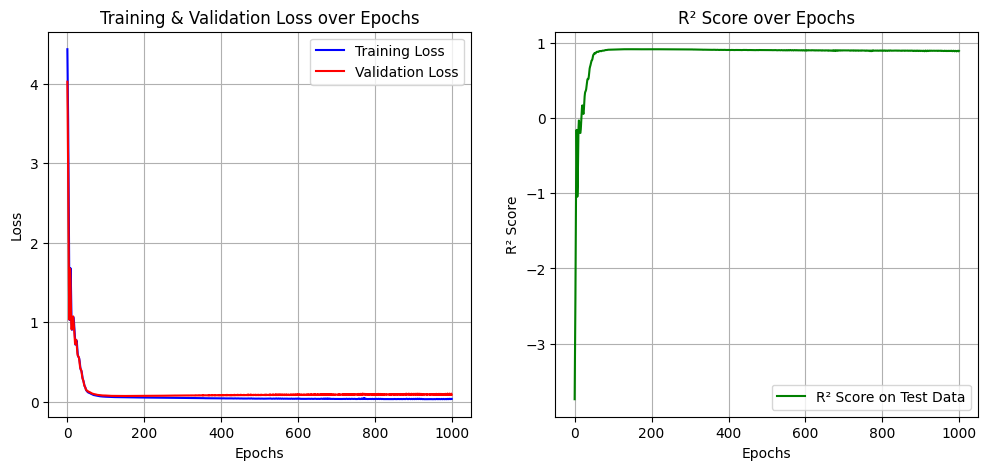

In [496]:
# رسم نمودار هزینه
plt.figure(figsize=(12, 5))

# نمودار `Loss`
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label="Training Loss", color="blue")
plt.plot(range(epochs), val_losses, label="Validation Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss over Epochs")
plt.legend()
plt.grid()

# نمودار `R²`
plt.subplot(1, 2, 2)
plt.plot(range(epochs), r2_scores, label="R² Score on Test Data", color="green")
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.title("R² Score over Epochs")
plt.legend()
plt.grid()

plt.show()
